# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/ML%20spring%202023/Module%2011-%20PCA/python/PCA_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Unsupervised Learning: Principle Component Analysis (PCA) 

## Using pca package
pca is a python package to perform Principal Component Analysis and to create insightful plots. The core of PCA is build on **sklearn** functionality to find maximum compatibility when combining with other packages. 

for **installation**:
pip install pca

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [44]:
rand_state= 1000

In [45]:
# to install the pca package, you need to run "pip install pca" first. On Google colab, do 
# !pip install pca
from pca import pca

In [46]:
pca()

In [47]:
usarrest = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/USArrests.csv')
usarrest.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [48]:
X= usarrest.drop('state', axis=1) # scaling the features will be automatically done. 
states = usarrest.state

In [49]:
model=pca(n_components=4, normalize=True) 

In [50]:
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [51]:
results

{'loadings':        Murder   Assault  UrbanPop      Rape
 PC1  0.535899  0.583184  0.278191  0.543432
 PC2  0.418181  0.187986 -0.872806 -0.167319
 PC3 -0.341233 -0.268148 -0.378016  0.817778
 PC4  0.649228 -0.743407  0.133878  0.089024,
 'PC':          PC1       PC2       PC3       PC4
 0   0.985566  1.133392 -0.444269  0.156267
 1   1.950138  1.073213  2.040003 -0.438583
 2   1.763164 -0.745957  0.054781 -0.834653
 3  -0.141420  1.119797  0.114574 -0.182811
 4   2.523980 -1.542934  0.598557 -0.341996
 5   1.514563 -0.987555  1.095007  0.001465
 6  -1.358647 -1.088928 -0.643258 -0.118469
 7   0.047709 -0.325359 -0.718633 -0.881978
 8   3.013042  0.039229 -0.576829 -0.096285
 9   1.639283  1.278942 -0.342460  1.076797
 10 -0.912657 -1.570460  0.050782  0.902807
 11 -1.639800  0.210973  0.259801 -0.499104
 12  1.378911 -0.681841 -0.677496 -0.122021
 13 -0.505461 -0.151563  0.228055  0.424666
 14 -2.253646 -0.104054  0.164564  0.017556
 15 -0.796881 -0.270165  0.025553  0.206496
 16 -0.7

In [52]:
loadings=results['loadings']
loadings

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


In [53]:
scores=results['PC']
scores['lables']=states
scores.head()

,PC1,PC2,PC3,PC4,lables
0,0.985566,1.133392,-0.444269,0.156267,Alabama
1,1.950138,1.073213,2.040003,-0.438583,Alaska
2,1.763164,-0.745957,0.054781,-0.834653,Arizona
3,-0.141420,1.119797,0.114574,-0.182811,Arkansas
4,2.523980,-1.542934,0.598557,-0.341996,California


---
## Scree plot

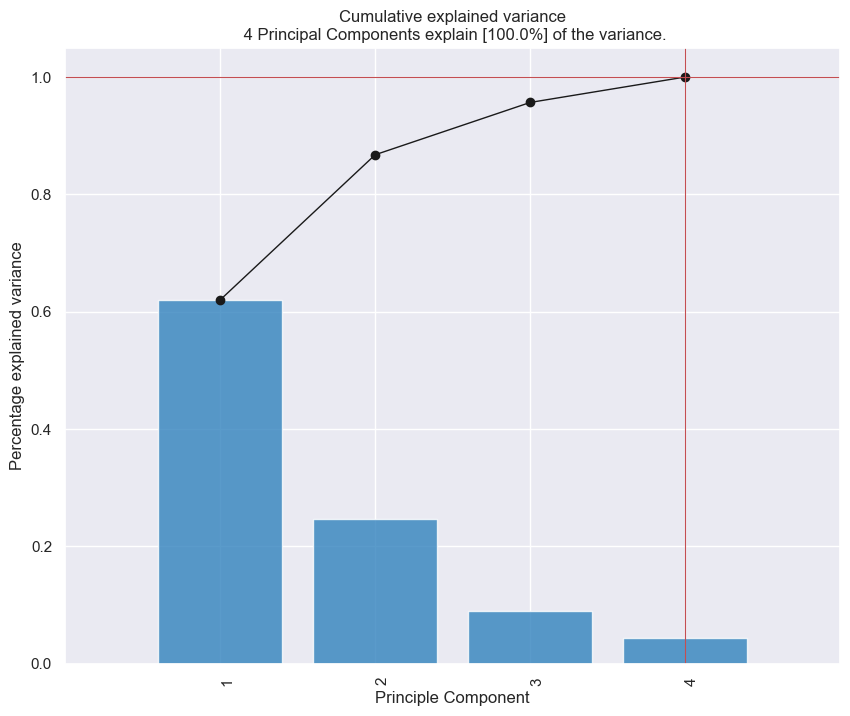

<Figure size 640x480 with 0 Axes>

In [54]:
model.plot(figsize=(10,8))
plt.show()

---
## Biplot

Biplot displays both the PC scores and PC loadings. We will use the **pca.biplot_** method from the **pca** library. 

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [50] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [50] unique colors! Available unique colors: [9].


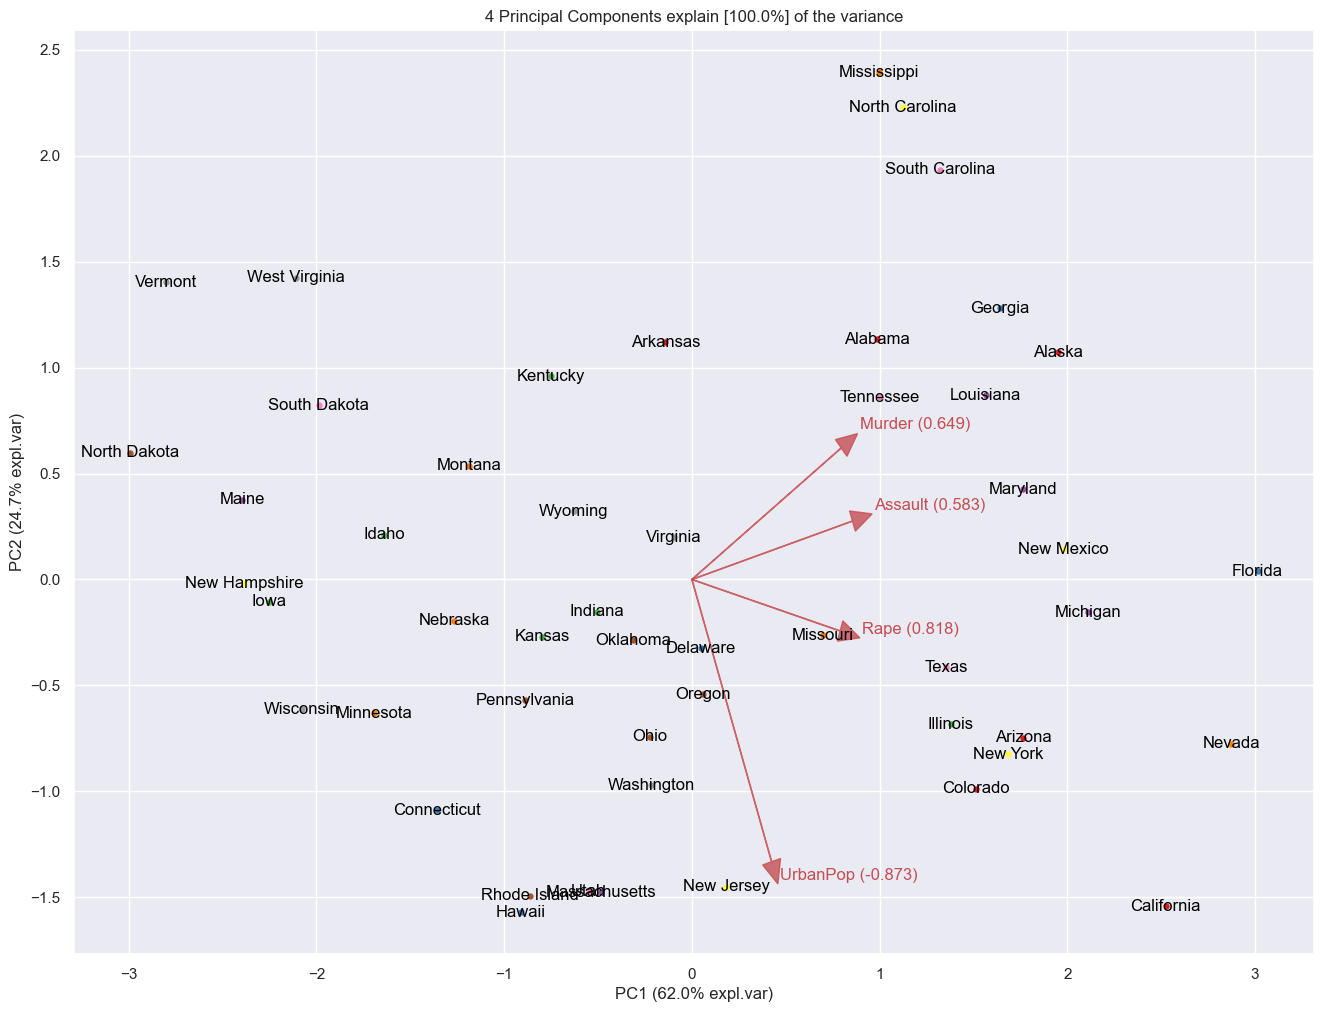

In [55]:
model.biplot(n_feat=4 , legend=False, figsize=(16,12), y=states , label=True)
plt.show()

In [56]:
loadings.T

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


--- 
## PCA application: Market Data

In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/market_data.csv')

In [58]:
df.head()

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,72,1/31/2018,0.86,0.85,0.86,0.90,0.84,0.01,0.17,0.09,...,0.54,0.85,1.00,0.99,0.22,0.83,-0.022,-0.078,0.001,0.000
1,78,1/31/2018,0.66,0.67,0.66,0.37,0.92,0.01,0.25,0.58,...,0.27,0.65,1.00,1.00,0.04,0.17,0.006,0.047,0.264,0.000
2,465,1/31/2018,0.57,0.65,0.64,0.71,0.18,0.01,0.35,0.46,...,0.18,0.61,1.00,1.00,0.99,1.00,0.033,0.095,0.393,-0.502
3,486,1/31/2018,0.48,0.52,0.50,0.36,0.30,0.01,0.81,0.81,...,0.70,0.85,0.99,0.99,0.96,0.98,-0.139,0.146,0.030,-0.463
4,552,1/31/2018,0.88,0.87,0.87,0.88,0.75,0.01,0.81,0.77,...,0.64,0.81,0.99,0.99,0.92,0.74,-0.044,-0.307,-0.349,-0.403


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451 entries, 0 to 4450
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stock_id                        4451 non-null   int64  
 1   date                            4451 non-null   object 
 2   Advt_12M_Usd                    4451 non-null   float64
 3   Advt_3M_Usd                     4451 non-null   float64
 4   Advt_6M_Usd                     4451 non-null   float64
 5   Asset_Turnover                  4451 non-null   float64
 6   Bb_Yld                          4451 non-null   float64
 7   Bv                              4451 non-null   float64
 8   Capex_Ps_Cf                     4451 non-null   float64
 9   Capex_Sales                     4451 non-null   float64
 10  Cash_Div_Cf                     4451 non-null   float64
 11  Cash_Per_Share                  4451 non-null   float64
 12  Cf_Sales                        44

In [60]:
df.dropna(inplace=True)

In [61]:
X= df.drop(['stock_id','date'], axis=1) # scaling the features will be automatically done. 

In [69]:
model=pca(n_components=0.8, normalize=True) 

In [70]:
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [97] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [14] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [97] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[14]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [71]:
#results

In [72]:
loadings=results['loadings']
loadings

,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,Cash_Div_Cf,Cash_Per_Share,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
PC1,0.123418,0.126343,0.125503,0.020272,0.063947,0.011040,0.041722,0.022285,0.035080,0.127626,...,0.076032,0.070140,0.043927,0.045840,-0.090418,-0.095654,-0.004191,-0.006775,-0.004689,-0.001792
PC2,0.138670,0.130818,0.133819,-0.044864,0.013430,-0.048431,0.090063,0.068790,-0.033752,-0.044533,...,0.222852,0.240883,0.213707,0.195219,0.020990,0.015851,0.004126,0.007243,0.007869,0.001106
PC3,-0.124841,-0.124347,-0.125028,-0.270337,-0.046424,0.049457,-0.097444,0.015554,0.120505,-0.022217,...,0.036238,0.033167,0.033519,0.085878,-0.167333,-0.165144,0.005037,0.009050,0.018021,0.019287
PC4,0.020009,0.016622,0.017209,-0.084317,-0.015861,-0.075290,-0.164698,-0.102309,0.012755,0.153057,...,0.026351,0.043163,0.049610,0.050242,0.063369,0.064443,0.044350,0.065484,0.081803,0.055316
PC5,-0.145089,-0.163347,-0.157988,0.090044,0.002183,0.083530,0.180394,-0.036947,0.076473,0.087074,...,0.027945,0.024663,0.041030,0.070706,0.025700,0.003042,0.039455,0.059148,0.066363,0.042994
PC6,0.078587,0.058823,0.066671,0.109729,0.078363,-0.162624,-0.188027,-0.178726,0.150659,-0.115806,...,-0.043341,-0.010266,-0.013382,0.063168,0.000812,-0.022155,-0.023959,-0.026799,-0.023334,-0.018346
PC7,-0.037797,-0.025135,-0.031061,0.105945,0.045114,0.007415,0.043063,-0.093855,0.196768,0.041974,...,0.016144,0.004651,-0.005726,0.013802,-0.242934,-0.256062,-0.018137,-0.019347,-0.001688,0.015594
PC8,0.001211,0.015458,0.008944,0.016339,0.012676,-0.056582,-0.073946,-0.216010,-0.059690,0.182959,...,0.020474,0.028986,-0.036970,0.042476,0.010089,0.037139,-0.020512,-0.023874,-0.035642,-0.039170
PC9,-0.020214,-0.028536,-0.025613,0.010047,0.044526,-0.103993,0.065216,0.061233,0.080191,-0.029345,...,0.021343,0.038694,0.009618,-0.113250,-0.097350,-0.096677,0.107755,0.134583,0.159673,0.108833
PC10,-0.121681,-0.108984,-0.112891,0.135607,-0.104014,-0.239232,-0.178528,-0.163576,0.118635,-0.147984,...,-0.006950,0.077932,0.172028,0.130477,0.019483,0.056559,0.038922,0.048070,0.052088,0.036022


In [73]:
scores=results['PC']
scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,6.363602,6.173358,-2.505720,-0.046872,-3.548449,3.646442,3.239294,3.767819,0.812230,0.405227,1.580828,0.768716,-0.922628,0.112499
1,9.523135,2.507746,1.660608,0.326084,-5.300193,0.318100,-1.242327,1.599830,2.907056,-1.439024,-1.285422,-1.226496,0.411917,-2.650325
2,5.800236,1.898347,-2.195355,1.877730,-2.937150,-0.332632,-3.458975,3.265389,1.186251,1.895817,-0.380933,-1.991984,0.448186,-0.233388
3,0.715543,9.557593,-0.380252,3.213823,-1.973124,-3.231285,-0.847184,2.958278,0.090562,0.506637,-0.248932,-1.154453,-0.719826,2.484464
4,9.303851,7.762789,-2.299554,-0.555043,-0.338351,3.320938,0.365971,2.617391,1.730907,-0.666147,2.323385,-3.205726,-0.591283,0.853636


In [74]:
scores.shape

(4450, 14)

---
## Scree plot

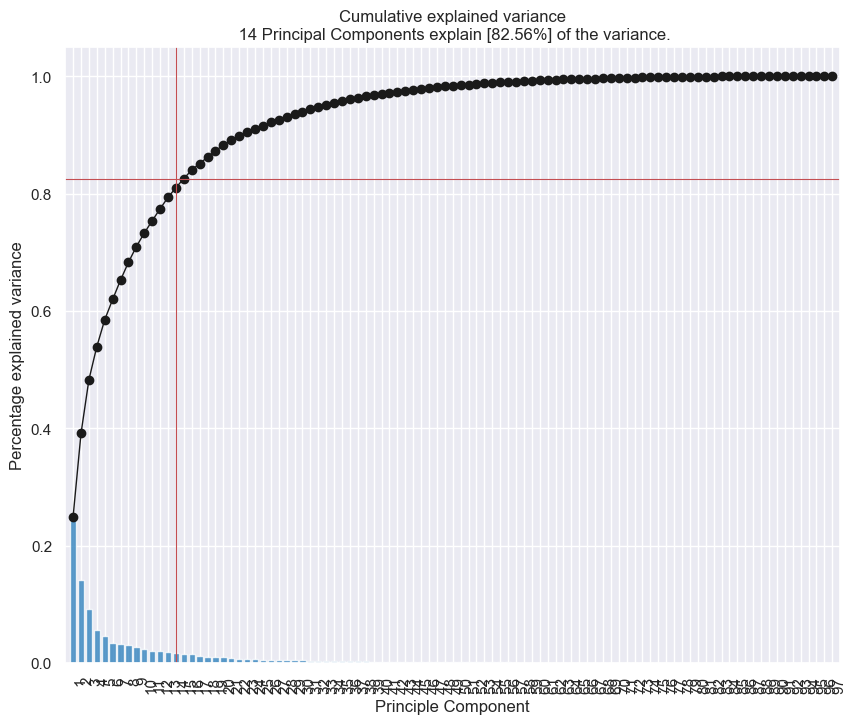

<Figure size 640x480 with 0 Axes>

In [75]:
model.plot(figsize=(10,8))
plt.show()

---
###  Additional links:
1. pca Python package documentation: https://pypi.org/project/pca/
2. PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
3. PCA visualization: https://setosa.io/ev/principal-component-analysis/
4. Kernel PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
5. Kernel PCA visualization: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
6. What is Singular Value Decomposition (SVD): https://www.youtube.com/watch?v=mBcLRGuAFUk